In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import cvxpy as cp

In [3]:
btc = pd.read_csv('BTC-USD.csv', nrows = 59)
vf_idea = pd.read_csv('IDEA.NS.csv', nrows = 59)
polygon = pd.read_csv('MATIC-INR.csv', nrows = 59)
minda = pd.read_csv('MINDACORP.NS.csv', nrows = 59)
moderna = pd.read_csv('MRNA.csv', nrows = 59)
nippon = pd.read_csv('NIFTYBEES.NS.csv', nrows = 59)
pidilite = pd.read_csv('PIDILITIND.NS.csv', nrows = 59)
invesco = pd.read_csv('QQQ.csv', nrows = 59)
spdr = pd.read_csv('SPY.csv', nrows = 59)
tesla = pd.read_csv('TSLA.csv', nrows = 59)

In [4]:
btc['Date'] = pd.to_datetime(btc['Date'])
vf_idea['Date'] = pd.to_datetime(vf_idea['Date'])
polygon['Date'] = pd.to_datetime(polygon['Date'])
minda['Date'] = pd.to_datetime(minda['Date'])
moderna['Date'] = pd.to_datetime(moderna['Date'])
nippon['Date'] = pd.to_datetime(nippon['Date'])
pidilite['Date'] = pd.to_datetime(pidilite['Date'])
invesco['Date'] = pd.to_datetime(invesco['Date'])
spdr['Date'] = pd.to_datetime(spdr['Date'])
tesla['Date'] = pd.to_datetime(tesla['Date'])

In [5]:
closing_prices = pd.DataFrame({
    'BTC': btc['Close'],
    'VF_IDEA': vf_idea['Close'],
    'Polygon': polygon['Close'],
    'Minda': minda['Close'],
    'Moderna': moderna['Close'],
    'Nippon': nippon['Close'],
    'Pidilite': pidilite['Close'],
    'Invesco': invesco['Close'],
    'SPDR': spdr['Close'],
    'Tesla': tesla['Close']
})

In [6]:
log_returns = np.log(closing_prices / closing_prices.shift(1))

In [7]:
log_returns = log_returns.drop(log_returns.index[0])

In [8]:
mean_returns = log_returns.mean()
print(mean_returns)

BTC         0.004191
VF_IDEA     0.005699
Polygon     0.004660
Minda       0.003221
Moderna     0.004508
Nippon      0.002001
Pidilite    0.002720
Invesco     0.003175
SPDR        0.002490
Tesla      -0.000019
dtype: float64


In [9]:
mean_returns = log_returns.mean()
number_of_trading_days = len(log_returns)
mean_returns_annualized = mean_returns * (252 / number_of_trading_days)
print(mean_returns_annualized)

BTC         0.018211
VF_IDEA     0.024760
Polygon     0.020247
Minda       0.013994
Moderna     0.019588
Nippon      0.008696
Pidilite    0.011819
Invesco     0.013795
SPDR        0.010819
Tesla      -0.000081
dtype: float64


In [10]:
covariance_matrix = log_returns.cov()

print("Covariance Matrix:")
print(covariance_matrix)

Covariance Matrix:
               BTC   VF_IDEA   Polygon     Minda   Moderna    Nippon  \
BTC       0.000499  0.000042 -0.000082 -0.000113  0.000196  0.000016   
VF_IDEA   0.000042  0.001522  0.000126 -0.000143 -0.000210  0.000043   
Polygon  -0.000082  0.000126  0.001666  0.000021 -0.000093 -0.000073   
Minda    -0.000113 -0.000143  0.000021  0.000531  0.000008 -0.000013   
Moderna   0.000196 -0.000210 -0.000093  0.000008  0.001313  0.000001   
Nippon    0.000016  0.000043 -0.000073 -0.000013  0.000001  0.000045   
Pidilite -0.000013  0.000087 -0.000045  0.000006  0.000060  0.000015   
Invesco   0.000031  0.000030 -0.000015 -0.000026  0.000027  0.000002   
SPDR      0.000035  0.000028 -0.000005 -0.000019  0.000060  0.000004   
Tesla     0.000101 -0.000051  0.000018  0.000015  0.000259  0.000037   

          Pidilite   Invesco      SPDR     Tesla  
BTC      -0.000013  0.000031  0.000035  0.000101  
VF_IDEA   0.000087  0.000030  0.000028 -0.000051  
Polygon  -0.000045 -0.000015 -0.000

In [11]:
n_assets = 10

In [12]:
weights = cp.Variable(n_assets)
target_return = cp.Parameter()

constraints = [
    cp.sum(weights) == 1,
    weights >= 0
]

portfolio_risk = cp.quad_form(weights, covariance_matrix.values)
objective = cp.Minimize(portfolio_risk)
problem = cp.Problem(objective, constraints)

problem.solve()

optimal_weights = weights.value

portfolio_return = np.dot(mean_returns_annualized, optimal_weights)
portfolio_risk_percentage = np.sqrt(portfolio_risk.value) * 100

print("Optimal Weights:")
print(optimal_weights)
print("Portfolio Return: %.2f%%" % (portfolio_return * 100), "Portfolio Risk: %.3f%%" % portfolio_risk_percentage)

Optimal Weights:
[ 2.08087220e-02 -3.74680689e-18  3.43683898e-02  6.31879182e-02
  8.12451493e-18  4.43046233e-01  7.15349929e-02  1.34461948e-18
  3.67053744e-01  1.42966248e-19]
Portfolio Return: 1.06% Portfolio Risk: 0.443%


In [13]:
constraints = [
    cp.sum(weights) == 1,
    weights >= 0
]

portfolio_risk = cp.quad_form(weights, covariance_matrix.values)
objective = cp.Minimize(portfolio_risk)

In [14]:
problem = cp.Problem(objective, constraints)
problem.solve()

optimal_weights = weights.value
portfolio_return = np.dot(mean_returns_annualized, optimal_weights)
portfolio_risk_percentage = np.sqrt(portfolio_risk.value) * 100

print("Optimal Weights:")
print(optimal_weights)
print("Portfolio Return: %.2f%%" % (portfolio_return * 100), "Portfolio Risk: %.3f%%" % portfolio_risk_percentage)

Optimal Weights:
[ 2.08087220e-02 -3.74680689e-18  3.43683898e-02  6.31879182e-02
  8.12451493e-18  4.43046233e-01  7.15349929e-02  1.34461948e-18
  3.67053744e-01  1.42966248e-19]
Portfolio Return: 1.06% Portfolio Risk: 0.443%


In [15]:
num_ports = 100

C:\Users\rahul\AppData\Local\Temp\ipykernel_17884\1111606493.py:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(efficient_frontier_volatilities_low_risk, efficient_frontier_returns, marker='o', cmap='viridis', label='Efficient Frontier')


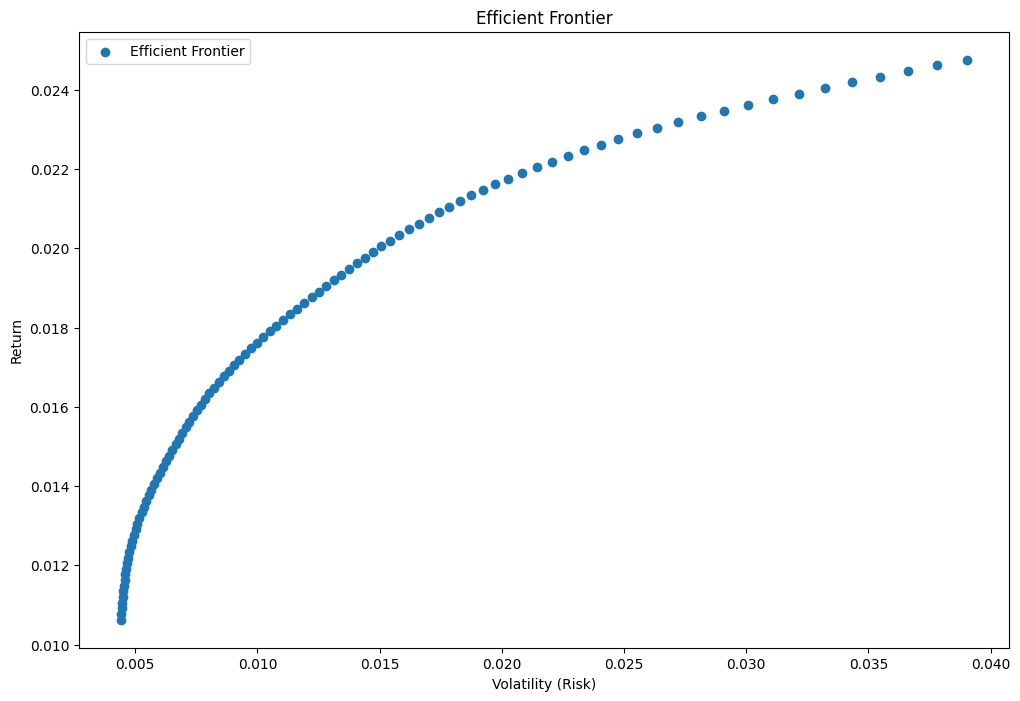

In [16]:
result = problem.solve()

min_risk_portfolio_return = np.sum(mean_returns_annualized * optimal_weights)

efficient_frontier_returns = np.linspace(min_risk_portfolio_return, np.amax(mean_returns_annualized), num_ports)
efficient_frontier_volatilities_low_risk = []
efficient_frontier_volatilities_high_risk = []

for ret in efficient_frontier_returns:
    target_return.value = ret

    problem_with_target_return_low = cp.Problem(objective, constraints + [cp.sum(cp.multiply(weights, mean_returns_annualized)) == target_return])
    problem_with_target_return_high = cp.Problem(objective, constraints + [cp.sum(cp.multiply(weights, mean_returns_annualized)) == target_return])

    problem_with_target_return_low.solve()
    weights_low_risk = weights.value
    efficient_frontier_volatilities_low_risk.append(np.sqrt(portfolio_risk.value))

    problem_with_target_return_high.solve()
    weights_high_risk = weights.value
    efficient_frontier_volatilities_high_risk.append(np.sqrt(portfolio_risk.value))

# Plot Efficient Frontier
plt.figure(figsize=(12, 8))
plt.scatter(efficient_frontier_volatilities_low_risk, efficient_frontier_returns, marker='o', cmap='viridis', label='Efficient Frontier')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Return')
plt.title('Efficient Frontier')
plt.legend()
plt.show()


In [17]:
# Target Risks and Returns
target_risk_low = 0.1
target_risk_high = 0.3

target_return_low = min_risk_portfolio_return + target_risk_low * np.sqrt(portfolio_risk.value)
target_return_high = min_risk_portfolio_return + target_risk_high * np.sqrt(portfolio_risk.value)

target_return.value = target_return_low
problem_with_target_return_low = cp.Problem(objective, constraints + [cp.sum(cp.multiply(weights, mean_returns_annualized)) == target_return])
problem_with_target_return_low.solve()
weights_low_risk_chosen = weights.value

target_return.value = target_return_high
problem_with_target_return_high = cp.Problem(objective, constraints + [cp.sum(cp.multiply(weights, mean_returns_annualized)) == target_return])
problem_with_target_return_high.solve()
weights_high_risk_chosen = weights.value

print("Optimal Weights for Low Risk Level (0.1 Risk):")
print(weights_low_risk_chosen)
print("Optimal Weights for High Risk Level (0.3 Risk):")
print(weights_high_risk_chosen)

Optimal Weights for Low Risk Level (0.1 Risk):
[ 1.10654545e-01  5.21397968e-02  5.54515948e-02  1.22724220e-01
  3.21790705e-02  1.34914158e-01  1.04293200e-01  3.87643415e-01
 -2.57313397e-18  2.65110441e-18]
Optimal Weights for High Risk Level (0.3 Risk):
[5.49394412e-02 5.25406842e-01 1.56940494e-01 1.72663015e-20
 2.62713222e-01 3.47316476e-20 2.48653096e-20 2.07162842e-20
 2.80266929e-20 5.37578798e-20]
